In [189]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [190]:
diab = pd.read_csv('D:\Projects\Diabetes prediction\diabetes.csv')

In [191]:
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [192]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [193]:
diab.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [194]:
diab.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [195]:
diab.shape

(768, 9)

In [196]:
diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Univariant Analysis 

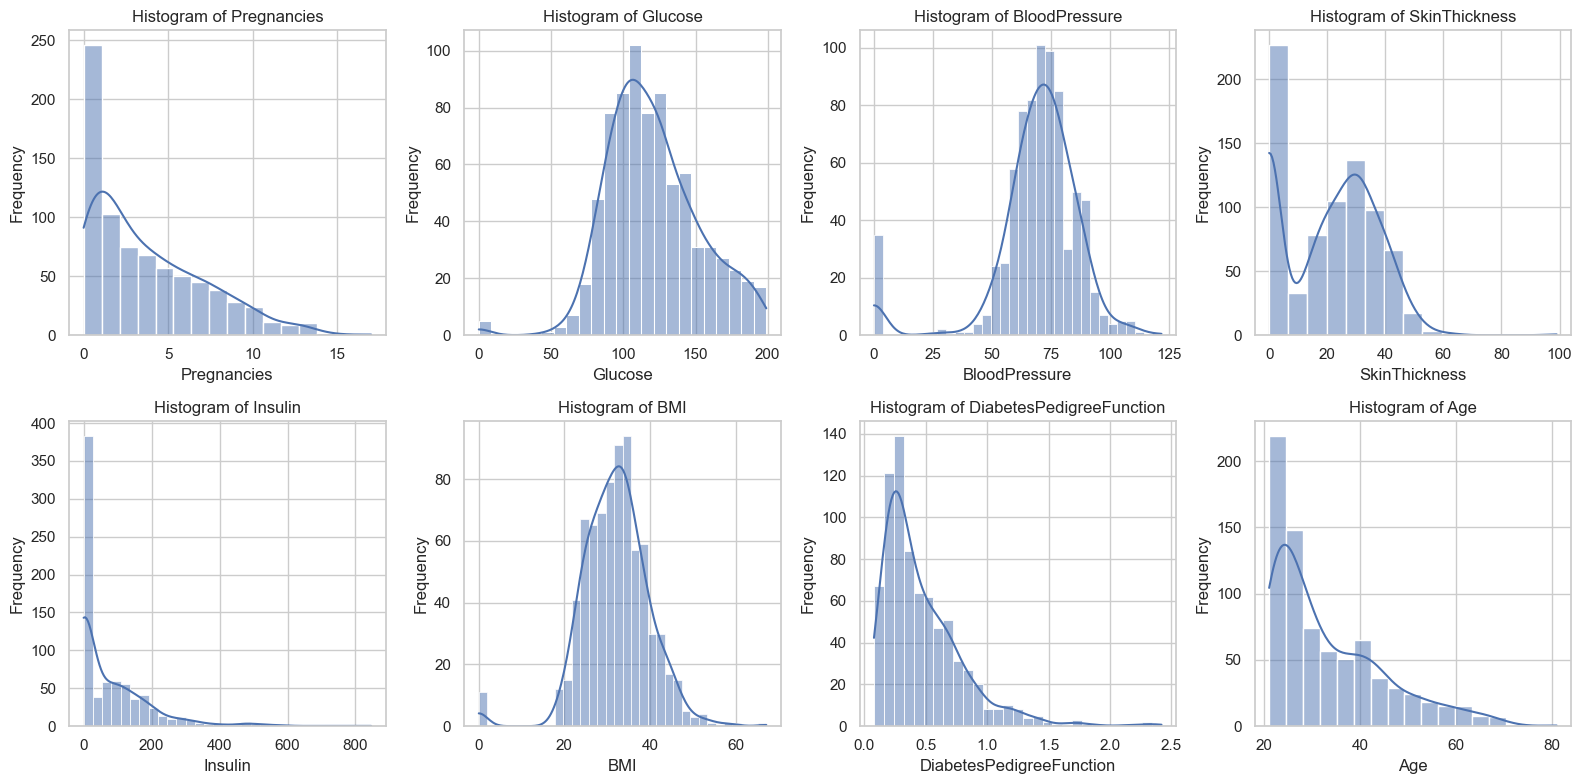

In [197]:
# Create subplots to display histograms for each column
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Column names
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Plot histograms for each column
for i, col in enumerate(columns):
    sns.histplot(data=diab, x=col, kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Histogram of {col}')
    axes[i//4, i%4].set_xlabel(col)
    axes[i//4, i%4].set_ylabel('Frequency')

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

looking at the graphs above we can see that the Blood pressure and BMI columns are the only columns with a normal frequency distribution 

## Bivariant Analysis

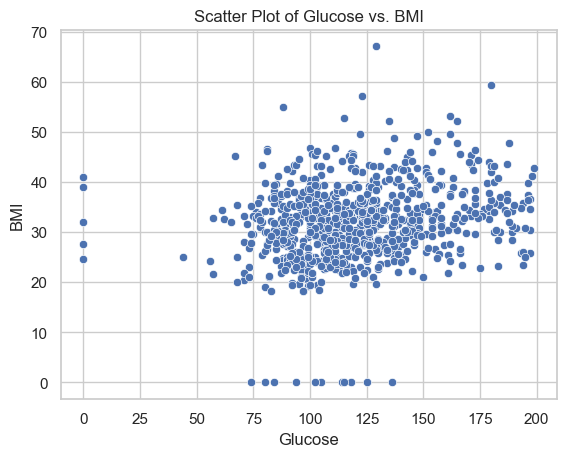

In [198]:
sns.scatterplot(data=diab, x='Glucose', y='BMI')
plt.title('Scatter Plot of Glucose vs. BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()


we can see a positive correlation between the BMI and glucose level of the patients with outliers in the plot

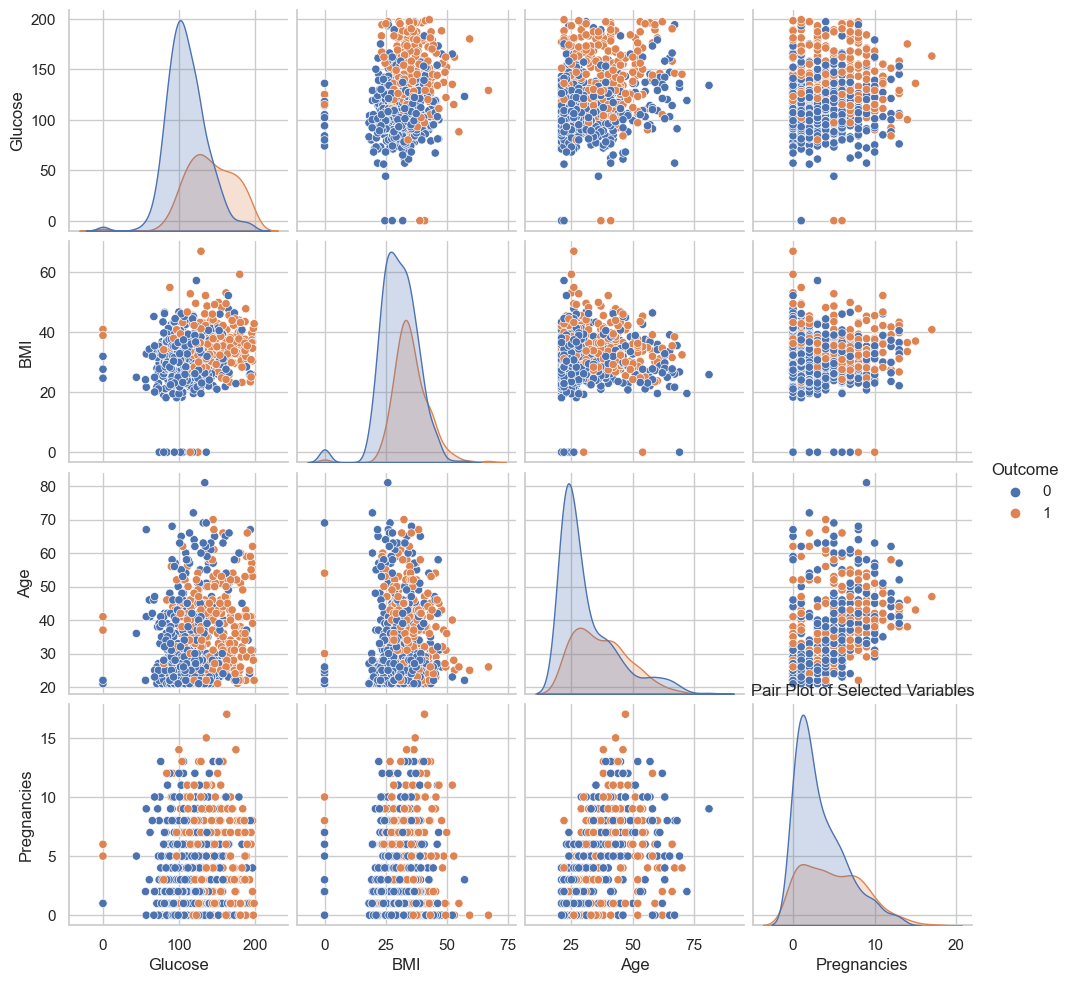

In [199]:
sns.pairplot(diab[['Glucose', 'BMI', 'Age', 'Pregnancies', 'Outcome']], hue='Outcome')
plt.title('Pair Plot of Selected Variables')
plt.show()


In [200]:
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


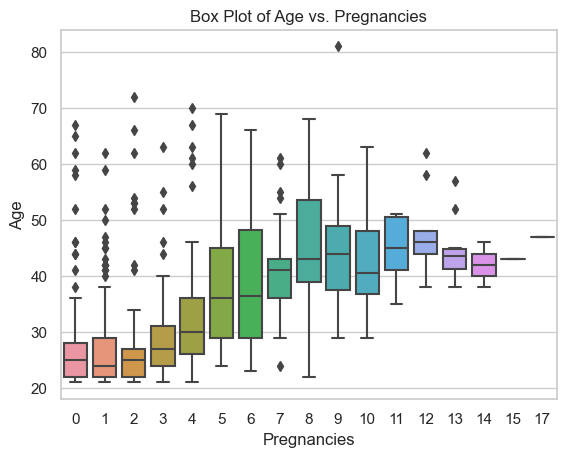

In [201]:
sns.boxplot(data=diab, x='Pregnancies', y='Age')
plt.title('Box Plot of Age vs. Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.show()


we can see that this two columns have alot of outliers 

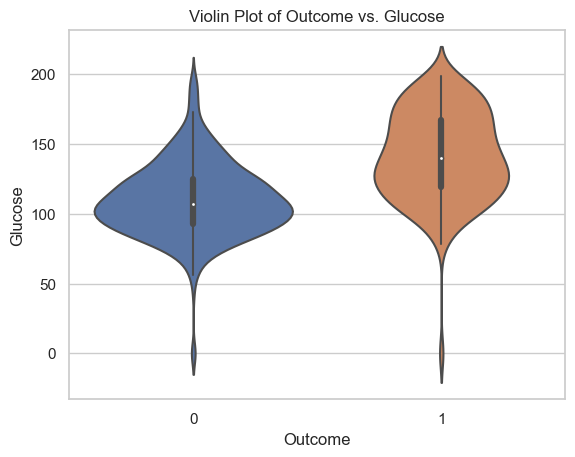

In [202]:
sns.violinplot(data=diab, x='Outcome', y='Glucose')
plt.title('Violin Plot of Outcome vs. Glucose')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()


## Multivariant Analysis

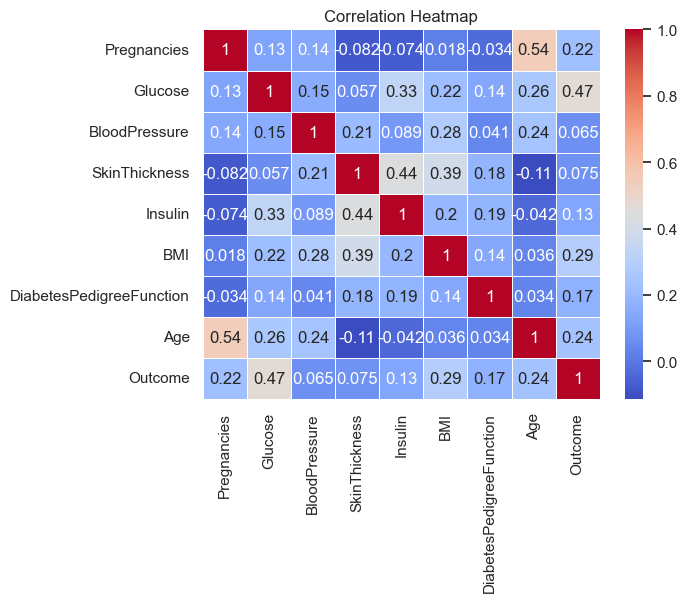

In [203]:
correlation_matrix = diab.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


shows theres a stron relationship between the 

# Feature Engineering

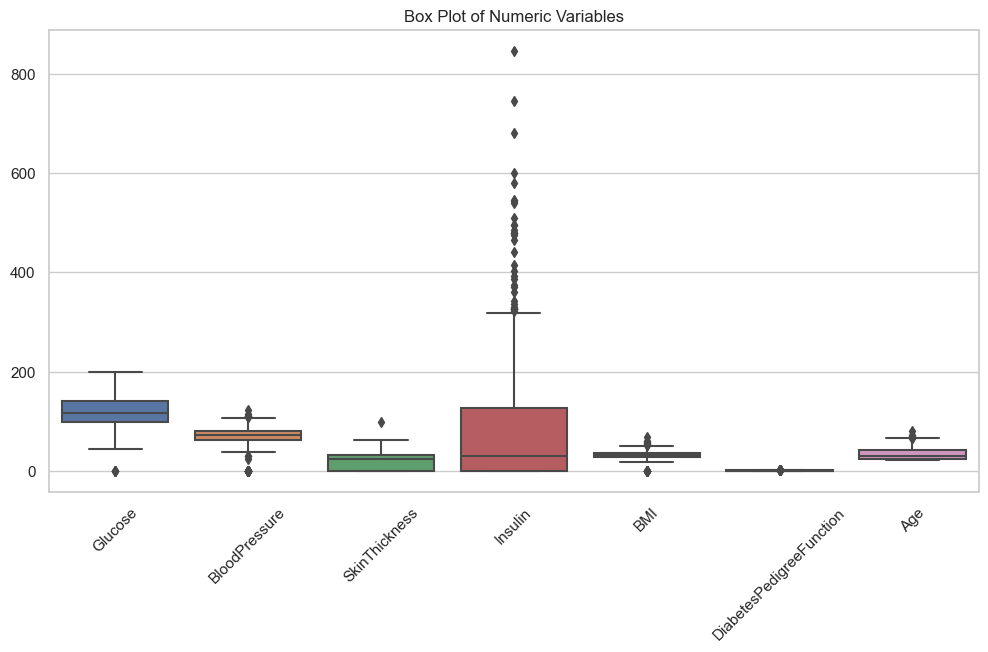

In [204]:
# checking for outliers and handling them
# Create box plots for numeric variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=diab[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
plt.title('Box Plot of Numeric Variables')
plt.xticks(rotation=45)
plt.show()

dataset obviously has outliers 

In [205]:
# we would Remove outliers using IQR
Q1 = diab.quantile(0.25)
Q3 = diab.quantile(0.75)
IQR = Q3 - Q1
diab_no_outliers = diab[~((diab < (Q1 - 1.5 * IQR)) | (diab > (Q3 + 1.5 * IQR))).any(axis=1)]


In [206]:
# handling missing values 
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

there are no missing values 

In [207]:
#checking for inbalnce in the dataset
class_counts = diab['Outcome'].value_counts()
class_counts


0    500
1    268
Name: Outcome, dtype: int64

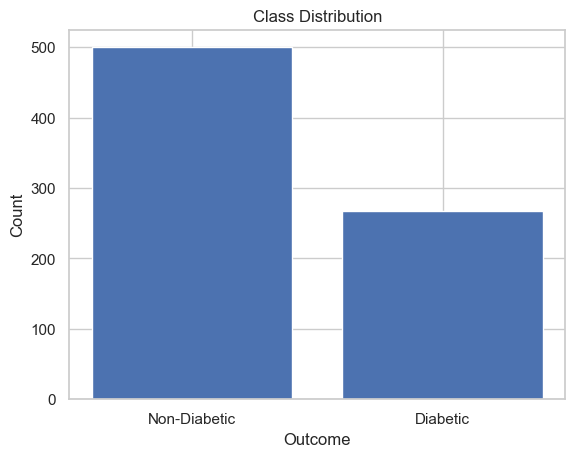

In [208]:
#visualizing the imbalance 
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(class_counts.index, ['Non-Diabetic', 'Diabetic'])
plt.show()


there is a class imbalance so we wont be balancing the dataset because we only have one variable which are females we would use a model that can predict without balancing the class 

In [209]:
#Feature Creation
# BMI Categories
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal Weight"
    elif 24.9 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

diab['BMI_Category'] = diab['BMI'].apply(bmi_category)

#  Age Categories
def age_category(age):
    if age < 30:
        return "Young"
    elif 30 <= age < 60:
        return "Adult"
    else:
        return "Elderly"

diab['Age_Category'] = diab['Age'].apply(age_category)


# Glucose-to-BMI Ratio
diab['Glucose_BMI_Ratio'] = diab['Glucose'] / diab['BMI']

#  Blood Pressure Categories
def blood_pressure_category(bp):
    if bp < 120:
        return "Normal"
    elif 120 <= bp < 130:
        return "Elevated"
    elif 130 <= bp < 140:
        return "Hypertension Stage 1"
    else:
        return "Hypertension Stage 2"

diab['BloodPressure_Category'] = diab['BloodPressure'].apply(blood_pressure_category)

#  Age-Glucose Interaction
diab['Age_Glucose_Interaction'] = diab['Age'] * diab['Glucose']




In [210]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMI_Category              768 non-null    object 
 10  Age_Category              768 non-null    object 
 11  Glucose_BMI_Ratio         768 non-null    float64
 12  BloodPressure_Category    768 non-null    object 
 13  Age_Glucose_Interaction   768 non-null    int64  
dtypes: float64

In [211]:


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the specified columns
diab_encoded['BMI_Category'] = label_encoder.fit_transform(diab['BMI_Category'])
diab_encoded['Age_Category'] = label_encoder.fit_transform(diab['Age_Category'])
diab_encoded['BloodPressure_Category'] = label_encoder.fit_transform(diab['BloodPressure_Category'])



In [212]:
diab_encoded


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category_0,...,BMI_Category_2,Age_Category_0,Age_Category_1,Glucose_BMI_Ratio,BloodPressure_Category_0,BloodPressure_Category_1,Age_Glucose_Interaction,BMI_Category,Age_Category,BloodPressure_Category
0,6,148,72,35,0,33.6,0.627,50,1,0,...,1,0,1,4.404762,0,1,7400,1,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0,...,0,0,1,3.195489,0,1,2635,2,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0,...,1,0,1,7.854077,0,1,5856,0,0,1
3,1,89,66,23,94,28.1,0.167,21,0,0,...,0,1,0,3.167260,0,1,1869,2,2,1
4,0,137,40,35,168,43.1,2.288,33,1,0,...,1,0,1,3.178654,0,1,4521,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,...,1,1,1,3.069909,0,1,6363,1,1,1
764,2,122,70,27,0,36.8,0.340,27,0,0,...,1,1,0,3.315217,0,1,3294,1,2,1
765,5,121,72,23,112,26.2,0.245,30,0,0,...,0,0,1,4.618321,0,1,3630,2,0,1
766,1,126,60,0,0,30.1,0.349,47,1,0,...,1,0,1,4.186047,0,1,5922,1,0,1


In [213]:
# scaling our dataset
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Specify the columns to scale
columns_to_scale = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome','BMI_Category_0', 'BMI_Category_1', 'Age_Category_0', 'Age_Category_1', 'BloodPressure_Category_0', 'BloodPressure_Category_1']

# Fit and transform the scaler on the specified columns
diab_scaled = scaler.fit_transform(diab_encoded[columns_to_scale])

# Create a new DataFrame with the scaled features
diab_scaled_df = pd.DataFrame(diab_scaled, columns=columns_to_scale)


In [214]:
diab_scaled_df

,Pregnancies,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome,BMI_Category_0,BMI_Category_1,Age_Category_0,Age_Category_1,BloodPressure_Category_0,BloodPressure_Category_1
0,0.352941,0.743719,0.353535,0.000000,0.234415,0.483333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.058824,0.427136,0.292929,0.000000,0.116567,0.166667,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.470588,0.919598,0.000000,0.000000,0.253629,0.183333,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.058824,0.447236,0.232323,0.111111,0.038002,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.000000,0.688442,0.353535,0.198582,0.943638,0.200000,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.484848,0.212766,0.039710,0.700000,0.0,0.0,0.0,1.0,1.0,0.0,1.0
764,0.117647,0.613065,0.272727,0.000000,0.111870,0.100000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
765,0.294118,0.608040,0.232323,0.132388,0.071307,0.150000,0.0,0.0,1.0,0.0,1.0,0.0,1.0
766,0.058824,0.633166,0.000000,0.000000,0.115713,0.433333,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [215]:

# Split the dataset into features (X) and target variable (y)
X = diab_scaled_df.drop("Outcome", axis=1)  # Features (all columns except "Outcome")
y = diab_scaled_df["Outcome"]  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (614, 12)
X_test shape: (154, 12)
y_train shape: (614,)
y_test shape: (154,)


In [216]:
## Instantiate the SMOTE object and apply it to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [217]:
# Calculate the class distribution in the original training dataset
class_counts_original = y_train.value_counts()

# Calculate the class distribution in the resampled training dataset
class_counts_resampled = y_train_resampled.value_counts()

# Display the class distributions
print("Original Training Class Distribution:")
print(class_counts_original)

print("\nResampled Training Class Distribution:")
print(class_counts_resampled)

Original Training Class Distribution:
0.0    401
1.0    213
Name: Outcome, dtype: int64

Resampled Training Class Distribution:
0.0    401
1.0    401
Name: Outcome, dtype: int64


# Building of the models 

### RandomForestClassifier 

In [218]:

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on your data
rf_classifier.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [219]:
# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Print metrics
print("Random Forest Classifier Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Metrics:
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.81        99
         1.0       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Accuracy Score: 0.7532467532467533


#### Support Vector Machine (SVM)

In [220]:
# Initialize the SVM Classifier
svm_classifier = SVC(random_state=42)

# Fit the model on your data
svm_classifier.fit(X_train, y_train)




SVC(random_state=42)

In [221]:
# Predict on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Print metrics
print("SVM Classifier Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))

SVM Classifier Metrics:
Confusion Matrix:
 [[85 14]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.86      0.83        99
         1.0       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Accuracy Score: 0.7727272727272727


#### Gradient Boosting Classifier

In [222]:
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model on your data
gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [223]:

# Predict on the test data
y_pred_gb = gb_classifier.predict(X_test)

# Print metrics
print("Gradient Boosting Classifier Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Classifier Metrics:
Confusion Matrix:
 [[74 25]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.75      0.76        99
         1.0       0.58      0.62      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.70      0.70       154

Accuracy Score: 0.7012987012987013


#### Logistic Regression:

In [224]:
# Initialize the Logistic Regression model
logistic_classifier = LogisticRegression(random_state=42)

# Fit the model on your data
logistic_classifier.fit(X_train, y_train)



LogisticRegression(random_state=42)

In [225]:
# Predict on the test data
y_pred_logistic = logistic_classifier.predict(X_test)

# Print metrics
print("Logistic Regression Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Accuracy Score:", accuracy_score(y_test, y_pred_logistic))


Logistic Regression Metrics:
Confusion Matrix:
 [[83 16]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        99
         1.0       0.70      0.67      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154

Accuracy Score: 0.7792207792207793


### K-Nearest Neighbors (KNN):

In [226]:
# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier()

# Fit the model on your data
knn_classifier.fit(X_train, y_train)



KNeighborsClassifier()

In [227]:
# Predict on the test data
y_pred_knn = knn_classifier.predict(X_test)

# Print metrics
print("K-Nearest Neighbors Classifier Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))


K-Nearest Neighbors Classifier Metrics:
Confusion Matrix:
 [[80 19]
 [24 31]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.81      0.79        99
         1.0       0.62      0.56      0.59        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154

Accuracy Score: 0.7207792207792207


In [228]:
# Comparing the scores 
# Create a dictionary with the classifier names and their respective metrics
data = {
    'Classifier': ['Random Forest', 'SVM', 'Gradient Boosting', 'Logistic Regression', 'K-Nearest Neighbors'],
    'Accuracy': [0.7532, 0.7727, 0.7013, 0.7792, 0.7208],
    'Precision (Class 0)': [0.81, 0.80, 0.78, 0.82, 0.77],
    'Recall (Class 0)': [0.80, 0.86, 0.75, 0.84, 0.81],
    'F1-score (Class 0)': [0.81, 0.83, 0.76, 0.83, 0.79],
    'Precision (Class 1)': [0.65, 0.71, 0.58, 0.70, 0.62],
    'Recall (Class 1)': [0.67, 0.62, 0.62, 0.67, 0.56],
    'F1-score (Class 1)': [0.66, 0.66, 0.60, 0.69, 0.59]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)
df



,Classifier,Accuracy,Precision (Class 0),Recall (Class 0),F1-score (Class 0),Precision (Class 1),Recall (Class 1),F1-score (Class 1)
0,Random Forest,0.7532,0.81,0.80,0.81,0.65,0.67,0.66
1,SVM,0.7727,0.80,0.86,0.83,0.71,0.62,0.66
2,Gradient Boosting,0.7013,0.78,0.75,0.76,0.58,0.62,0.60
3,Logistic Regression,0.7792,0.82,0.84,0.83,0.70,0.67,0.69
4,K-Nearest Neighbors,0.7208,0.77,0.81,0.79,0.62,0.56,0.59


we will chose our model based on accuracy score which Logistic regression is the highest 

In [229]:
y_pred_knn

array([0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.])

### Hyperparameter Tunning 

In [ ]:
# we will tune the logistic regression 
